# Исследование данных о компьютерных играх

Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Нам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании для интернет-магазина «Стрим», который продаёт по всему миру компьютерные игры.
Перед нами данные до 2016 года. В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

### Откроем файл с данными и изучим основную информацию

Импортируем библиотеку pandas, numpy, matplotlib.pyplot, seaborn и scipy. Считаем данные из csv-файла в датафрейм и сохраним в переменную data. Выведем первые 10 строк таблицы:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sbrn
from scipy import stats as st
data = pd.read_csv('/datasets/games.csv')
data.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


Построим общую гистограмму для всех числовых столбцов таблицы:

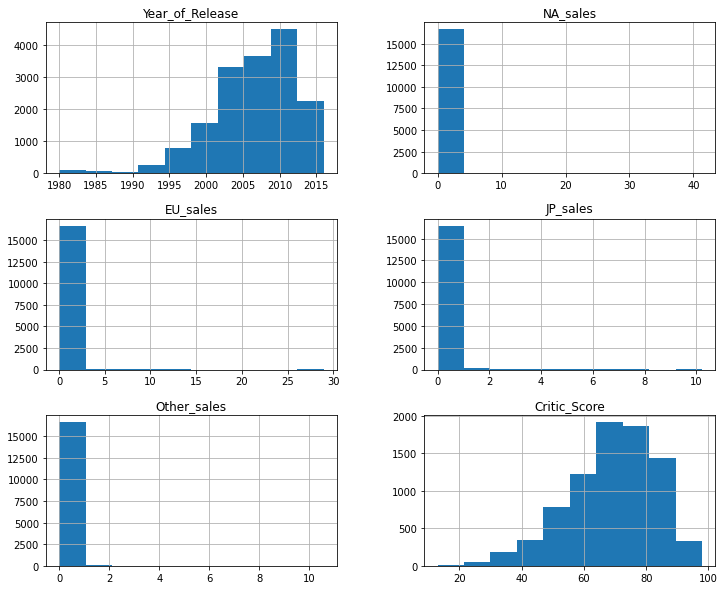

In [2]:
data.hist(figsize=(12, 10),bins=10);

Выведем основную информацию с помощью метода info() и проверим данные на наличие явных дубликатов:

In [3]:
print('Количество явных дубликатов:', data.duplicated().sum())
print()
data.info()

Количество явных дубликатов: 0

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Вывод: в полученных данных при изучении информации выделяется наличие пропущенных значений, написание столбцов не нижним регистром, неверные типы данных значений. Количество явных дубликатов не найдено, гистограммы требуют более детального анализа.

### Предобработка данных

Заменим названия столбцов на корректные (приведем их к нижнему регистру) и поясняющие в каких величинах представлены данные:

In [4]:
data.columns = data.columns.str.lower()
data.rename(columns = {'na_sales': 'na_sales_mln_copies',\
                       'eu_sales':'eu_sales_mln_copies',\
                       'jp_sales':'jp_sales_mln_copies',\
                       'other_sales':'other_sales_mln_copies',\
                       'critic_score': 'critic_score_out_of_100',\
                       'user_score': 'user_score_out_of_10'},inplace=True)
data.tail(5)

,name,platform,year_of_release,genre,na_sales_mln_copies,eu_sales_mln_copies,jp_sales_mln_copies,other_sales_mln_copies,critic_score_out_of_100,user_score_out_of_10,rating
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.0,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.0,NaN,NaN,NaN
16714,Winning Post 8 2016,PSV,2016.0,Simulation,0.00,0.00,0.01,0.0,NaN,NaN,NaN


В данных обнаружены пропущенные значения, выведем их количество по каждому столбцу:

In [5]:
data.isna().sum()

name                          2
platform                      0
year_of_release             269
genre                         2
na_sales_mln_copies           0
eu_sales_mln_copies           0
jp_sales_mln_copies           0
other_sales_mln_copies        0
critic_score_out_of_100    8578
user_score_out_of_10       6701
rating                     6766
dtype: int64

В столбце `name` всего 2 пропущенных значения, посмотрим что содержат эти строки:

In [6]:
data[data['name'].isnull() == True]

,name,platform,year_of_release,genre,na_sales_mln_copies,eu_sales_mln_copies,jp_sales_mln_copies,other_sales_mln_copies,critic_score_out_of_100,user_score_out_of_10,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Обе игры 1993 года с платформой GEN, которая уже потеряла свою актуальность, информация в остальных столбцах не значительна, поэтому удалим эти строки. Данный тип пропусков полностью случайный.

In [7]:
data = data.dropna(subset=['name'])
data.isna().sum()

name                          0
platform                      0
year_of_release             269
genre                         0
na_sales_mln_copies           0
eu_sales_mln_copies           0
jp_sales_mln_copies           0
other_sales_mln_copies        0
critic_score_out_of_100    8576
user_score_out_of_10       6699
rating                     6764
dtype: int64

Также удалим строки с пропущенными значениями столбца `year of release`. Данный тип пропуска полностью случайный. Заменить его другими значениями не получится, так как выпуск одной и той же игры на разных платформах происходит в разное время.

In [8]:
data = data.dropna(subset=['year_of_release'])
data.isna().sum()

name                          0
platform                      0
year_of_release               0
genre                         0
na_sales_mln_copies           0
eu_sales_mln_copies           0
jp_sales_mln_copies           0
other_sales_mln_copies        0
critic_score_out_of_100    8461
user_score_out_of_10       6605
rating                     6676
dtype: int64

Пропуски в столбцах `critic_score_out_of_100`, `user_score_out_of_10` и `rating` мы не можем заменить другими значениями или удалить, причина по которой эти данные не заполнены не известна, поэтому их оставляем. Рассмотрим подробнее столбец `rating` на наличие уникальных значений, содержащихся в нем:

In [9]:
data['user_score_out_of_10'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Из данных следует, что помимо значения nan в столбце содержится значение tbd, которое дословно означает 'подлежит уточнению', так как по смысловой нагрузке в рамках столбца с рейтингом nan и tbd равны - заменим значение tbd на nan.

In [10]:
data.loc[data['user_score_out_of_10'] == 'tbd', 'user_score_out_of_10'] = np.nan

Проверим типы данных в каждом столбце:

In [11]:
data.dtypes

name                        object
platform                    object
year_of_release            float64
genre                       object
na_sales_mln_copies        float64
eu_sales_mln_copies        float64
jp_sales_mln_copies        float64
other_sales_mln_copies     float64
critic_score_out_of_100    float64
user_score_out_of_10        object
rating                      object
dtype: object

Из таблицы следует, что тип данных в столбце `year_of_release` следует заменить с **float64** на **int**, так как год это целое число. `user_score_out_of_10` на **float64**, потому что данные столбца содержат числовой рейтинг оценки.

In [12]:
data['year_of_release'] = data['year_of_release'].astype('int')
data['user_score_out_of_10'] = data['user_score_out_of_10'].astype('float64')
data.dtypes

name                        object
platform                    object
year_of_release              int64
genre                       object
na_sales_mln_copies        float64
eu_sales_mln_copies        float64
jp_sales_mln_copies        float64
other_sales_mln_copies     float64
critic_score_out_of_100    float64
user_score_out_of_10       float64
rating                      object
dtype: object

Добавим столбец с общим количеством проданных копий игр, для этого просуммируем столбцы с данными по продажам копий `na_sales_mln_copies`, `eu_sales_mln_copies`, `jp_sales_mln_copies`, `other_sales_mln_copies`

In [13]:
data['total_sales_mln_copies'] = data.na_sales_mln_copies +\
data.eu_sales_mln_copies + data.jp_sales_mln_copies + data.other_sales_mln_copies
data.head(5)

,name,platform,year_of_release,genre,na_sales_mln_copies,eu_sales_mln_copies,jp_sales_mln_copies,other_sales_mln_copies,critic_score_out_of_100,user_score_out_of_10,rating,total_sales_mln_copies
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


Вывод: мы обработали данные, а именно -  привели столбцы к нижнему регистру и изменили названия на корректные, разобрались с пропущенными значениями, привели столбцы к верным типам данных и создали столбец с общим количеством проданных копий. Теперь таблица намного удобнее в использовании, можно приступать к анализу данных.

### Исследовательский анализ данных

- **Проанализируем количество игр в рамках разных лет выпуска, для этого построим диаграмму размаха и гистограмму:**

count      37.000000
mean      444.432432
std       451.604334
min         9.000000
25%        36.000000
50%       338.000000
75%       762.000000
max      1427.000000
Name: year_of_release, dtype: float64

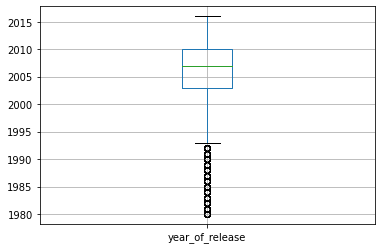

In [14]:
data.boxplot(column=['year_of_release']);
data['year_of_release'].value_counts().describe()

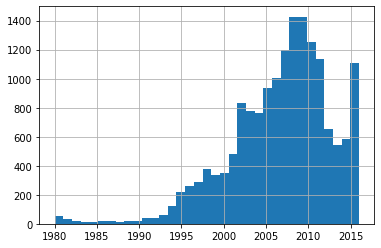

In [15]:
data['year_of_release'].hist(bins=35);

In [16]:
data['year_of_release'].value_counts().head(10)

2008    1427
2009    1426
2010    1255
2007    1197
2011    1136
2006    1006
2005     939
2002     829
2003     775
2004     762
Name: year_of_release, dtype: int64

Из графиков следует: 
- всего рассматриваются данные за 37 лет
- в среднем в год выпускалось 338 игр
- данные до 1994 года можно не учитывать, такие выбросы хорошо видно на диаграмме размаха (с 1980 по 1994 в год выпускалось менее 60 игр)
- наибольшее количество игр выпустилось в 2008 (1427 игр) и 2009 (1426 игр), после этого пика последовал спад, что можно связать с большей работой над качеством игр и соответственно увеличением временного интервала между релизами, а также доля консолевых игр могла сократиться засчет увеличения количества мобильных приложений.

- **Проанализируем, как менялись продажи по платформам. Выберем платформы с наибольшими суммарными продажами и построим распределение по годам. Выясним, за какой характерный срок появляются новые и исчезают старые платформы**

Посмотрим какие разновидности платформ содержатся в данных:

In [17]:
data['platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

Сгруппируем данные по платформе и ее суммарным продажам и посмотрим на графике какие платформы оказались наиболее успешными по продажам игр за весь период времени:

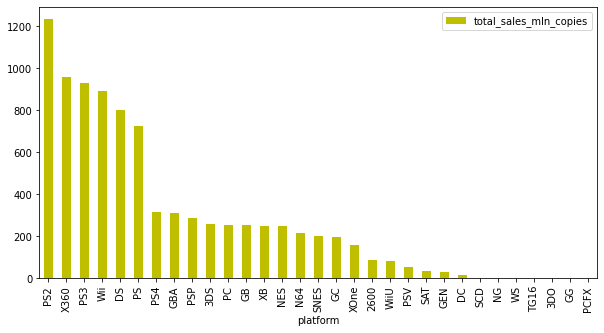

In [18]:
data.groupby('platform').agg({'total_sales_mln_copies':'sum'})\
.sort_values('total_sales_mln_copies',ascending=False)\
.plot(kind='bar',figsize=(10,5), color = 'y');

Наибольшее количество копий было продано на платформе PS2, X360, PS3, Wii, DS, PS. Половина платформ, попавших в топ, принадлежит компании Sony, в том числе первое место по продажам за все время (PS2). Посмотрим эти платформы более детально, для этого построим отдельные гистограммы по каждой из них:

In [19]:
def platform_hist (name,title):
    data[data['platform'] == name]\
        .groupby('year_of_release')\
        .agg({'total_sales_mln_copies':'sum'})\
        .plot(kind='bar', figsize=(6,5))
    plt.title(title)

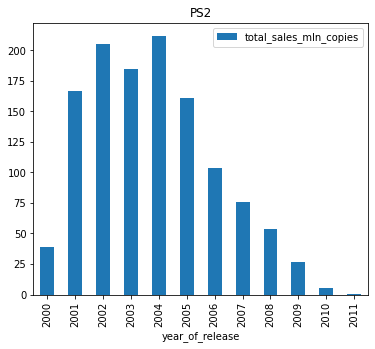

In [20]:
platform_hist('PS2','PS2')

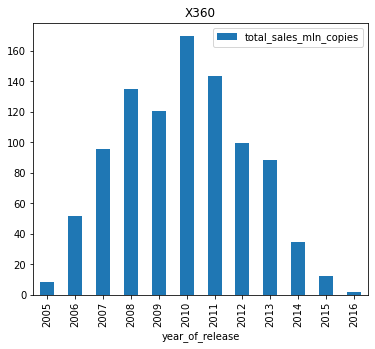

In [21]:
platform_hist('X360','X360')

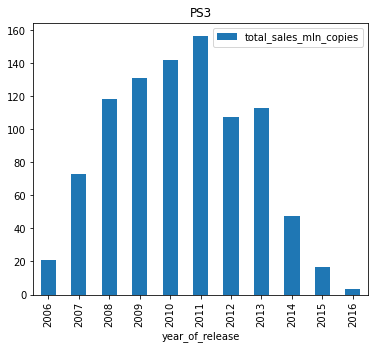

In [22]:
platform_hist('PS3','PS3')

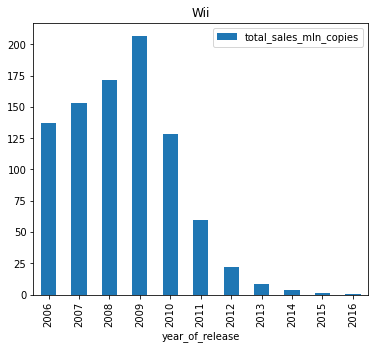

In [23]:
platform_hist('Wii','Wii')

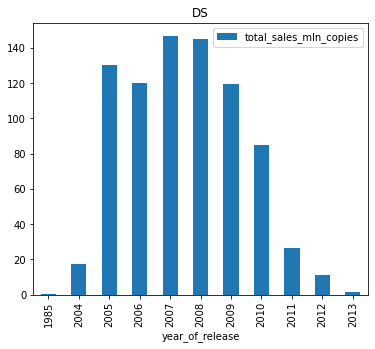

In [24]:
platform_hist('DS','DS')

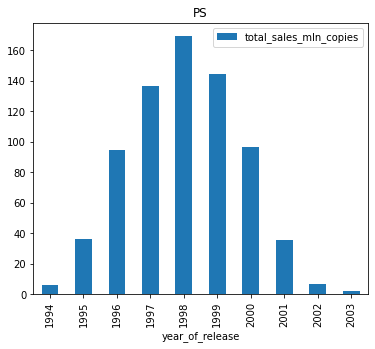

In [25]:
platform_hist('PS','PS')

В среднем каждая платформа существовала на протяжении 10 лет, пик продаж происходит в среднем через 4 года с даты релиза. На примере компании Sony прослеживается закономерность - при падении продаж происходит выпуск новой платформы, например спад продаж PS2 пришелся на 2005 и в 2006 вышла новая платформа PS3. Компания Sony занимает половину лидирующих позиций. Построим график роста и спад продаж между разными платформами внутри одной компании. Данные помогут нам ориентрироваться за какой период стоит взять актуальные данные и работать с ними.Определим актуальный период, который поможет построить прогноз на 2017 год.

In [26]:
PS = data[data['platform'] == 'PS']\
    .groupby('year_of_release', as_index=False)\
    .agg({'total_sales_mln_copies':'sum'})
PS2 = data[data['platform'] == 'PS2']\
    .groupby('year_of_release', as_index=False)\
    .agg({'total_sales_mln_copies':'sum'})
PS3 = data[data['platform'] == 'PS3']\
    .groupby('year_of_release', as_index=False)\
    .agg({'total_sales_mln_copies':'sum'})
PS4 = data[data['platform'] == 'PS4']\
    .groupby('year_of_release', as_index=False)\
    .agg({'total_sales_mln_copies':'sum'})

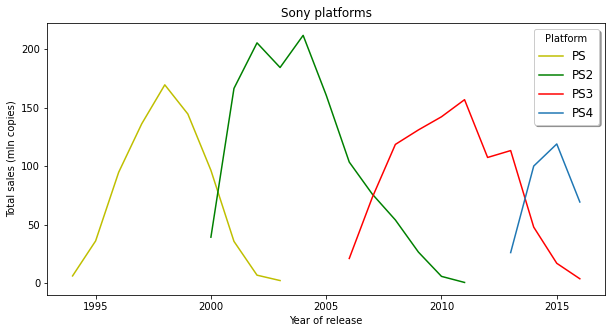

In [27]:
plt.figure(figsize=(10, 5))
plt.plot(PS.year_of_release, PS.total_sales_mln_copies, 'y',
         PS2.year_of_release, PS2.total_sales_mln_copies, 'g',
         PS3.year_of_release, PS3.total_sales_mln_copies, 'r',
         PS4.year_of_release, PS4.total_sales_mln_copies)
plt.title('Sony platforms')
plt.legend(['PS','PS2', 'PS3', 'PS4'], fontsize=12, shadow=True, title='Platform')
plt.xlabel('Year of release')
plt.ylabel('Total sales (mln copies)');

Посмотрим на график разных платформ внутри компании Microsoft

In [28]:
XB = data[data['platform'] == 'XB']\
    .groupby('year_of_release', as_index=False)\
    .agg({'total_sales_mln_copies':'sum'})
X360 = data[data['platform'] == 'X360']\
    .groupby('year_of_release', as_index=False)\
    .agg({'total_sales_mln_copies':'sum'})
XOne = data[data['platform'] == 'XOne']\
    .groupby('year_of_release', as_index=False)\
    .agg({'total_sales_mln_copies':'sum'})

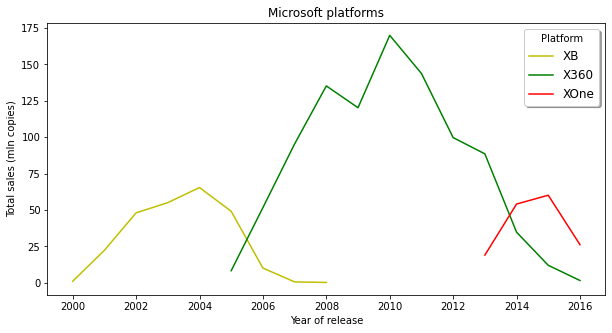

In [29]:
plt.figure( figsize=(10, 5))
plt.plot(XB.year_of_release, XB.total_sales_mln_copies, 'y',
         X360.year_of_release, X360.total_sales_mln_copies, 'g',
         XOne.year_of_release, XOne.total_sales_mln_copies, 'r')
plt.title('Microsoft platforms')
plt.legend(['XB','X360', 'XOne'], fontsize=12, shadow=True, title='Platform')
plt.xlabel('Year of release')
plt.ylabel('Total sales (mln copies)');

Закономерность выпуска новых платформ компании Microsoft такая же как у Sony. При спаде продаж старой платформы, появляется новая. Исходя из того, что жизненный цикл платформ составляет 10 лет, а их пик приходится на четвертый год продаж, чтобы объективно составить прогноз на 2017 год - возьмем данные начиная с 2014 года. В этот год заметен рост продаж новых платформ и спад старых. Более ранние периоды не имеет смысла анализировать, потому что их пик продаж произойдет спустя 4 года и в 2017 начнется спад, выгоды от продвижения таких платформ будет меньше, чем от новых поколений.

- **Создадим новый датафрейм с актуальным периодом и посмотрим распределение платформ по суммарным продажам за 2014-2016:**

In [30]:
actual_data = data[data['year_of_release'] >= 2014]

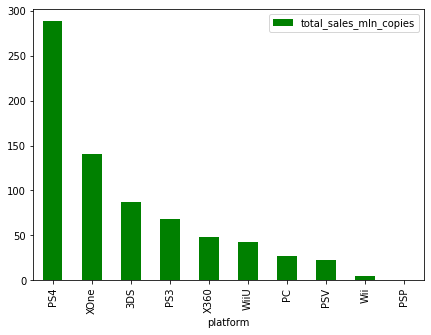

In [31]:
actual_data.groupby('platform').agg({'total_sales_mln_copies':'sum'})\
.sort_values('total_sales_mln_copies',ascending=False)\
.plot(kind='bar',figsize=(7,5), color = 'g');

- **Посмотрим рапределение каждой платформы в рамках одного года актуального периода, чтобы выявить лидеров продаж и выбрать потенциально прибыльные платформы:**

In [32]:
def platform_by_year (year,title):
    actual_data[actual_data['year_of_release'] == year]\
    .groupby('platform')\
    .agg({'total_sales_mln_copies':'sum'})\
    .sort_values('total_sales_mln_copies', ascending=False)\
    .plot(kind='bar', figsize=(7,5))
    plt.title(title)

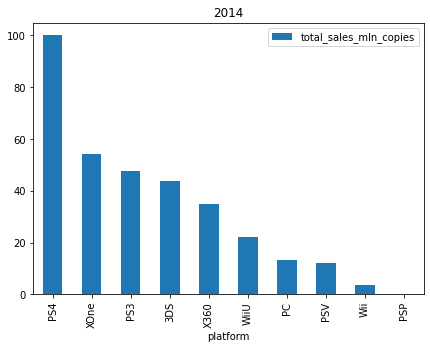

In [33]:
platform_by_year(2014,2014)

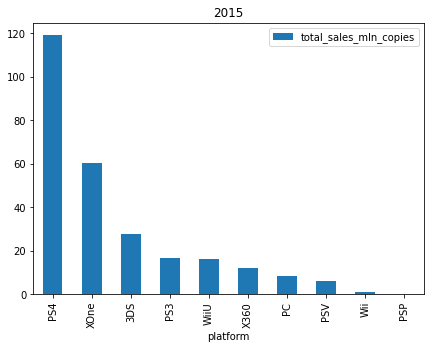

In [34]:
platform_by_year(2015,2015)

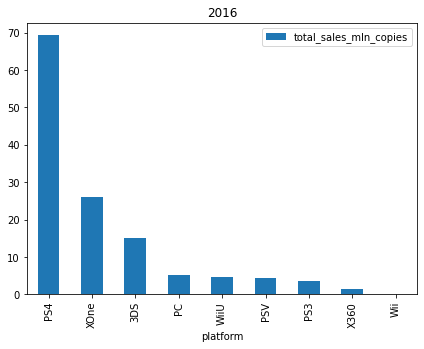

In [35]:
platform_by_year(2016,2016)

Из полученных данных следует, что платформа PS4 занимает лидирующие позиции за выбранный актуальный период, на втором месте с ощутимым отставанием находится платформа Xone. Третье место в 2014 году занимала PS3, но так как ее выместила PS4, с 2015 года ее продажи сильно сократились и на смену ей пришла 3DS, занимающая третье место с 2015 года. Рассмотрим на графиках каждую из этих платформ в рамках актуального периода

In [36]:
PS4 = actual_data[actual_data['platform'] == 'PS4']\
    .groupby('year_of_release', as_index=False)\
    .agg({'total_sales_mln_copies':'sum'})
XOne = actual_data[actual_data['platform'] == 'XOne']\
    .groupby('year_of_release', as_index=False)\
    .agg({'total_sales_mln_copies':'sum'})
DS3 = actual_data[actual_data['platform'] == '3DS']\
    .groupby('year_of_release', as_index=False)\
    .agg({'total_sales_mln_copies':'sum'})

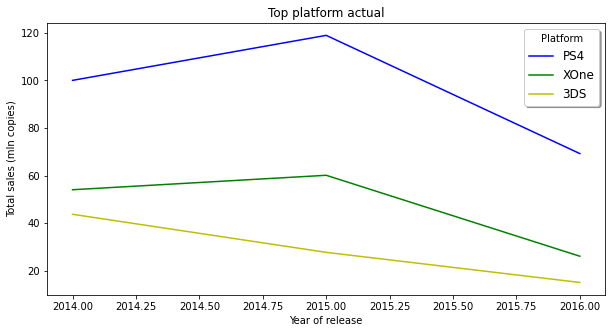

In [37]:
plt.figure( figsize=(10, 5))
plt.plot(PS4.year_of_release, PS4.total_sales_mln_copies, 'b',
         XOne.year_of_release, XOne.total_sales_mln_copies, 'g',
         DS3.year_of_release, DS3.total_sales_mln_copies, 'y')
plt.title('Top platform actual')
plt.legend(['PS4','XOne', '3DS'], fontsize=12, shadow=True, title='Platform')
plt.xlabel('Year of release')
plt.ylabel('Total sales (mln copies)');

На графике можно наблюдать рост платформ PS4 и XOne с пиком в 2015 году и дальнейший спад продаж в 2016, это может быть связано с общим спадом в индустрии о котором говорилось ранее, а также с тем, что данные за 2016 год не полные, поэтому с полной уверенностью нельзя утверждать, что данные лидирующие платформы стали менее востребованы. Что касается 3DS, ее спад равномерен с 2014 года и вкладываться в рекламу данной платформы потенциально не выгодно. Таким образом мы выбрали две потенциально прибыльные платформы - это PS4 и XOne.

- **Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам**

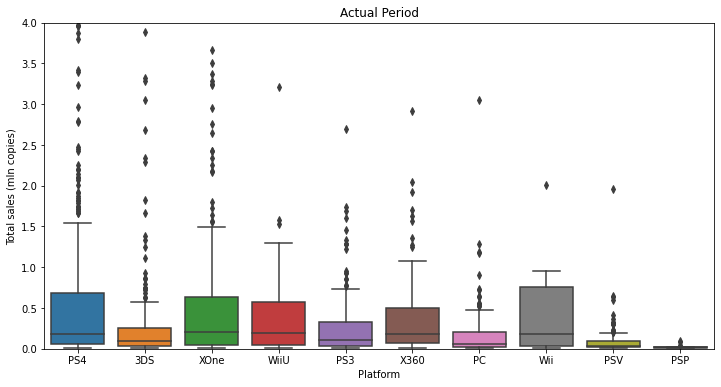

In [38]:
plt.figure(figsize=(12,6))
sbrn.boxplot(x='platform', y='total_sales_mln_copies', data=actual_data)
plt.xlabel('Platform')
plt.ylabel('Total sales (mln copies)')
plt.title('Actual Period')
plt.ylim([0, 4]);

In [39]:
actual_data.groupby('platform')['total_sales_mln_copies'].agg(['count', 'mean', 'median'])

,count,mean,median
platform,,,
3DS,212,0.408868,0.090
PC,151,0.179139,0.060
PS3,219,0.311324,0.110
PS4,376,0.766356,0.185
PSP,13,0.027692,0.020
PSV,295,0.075932,0.040
Wii,11,0.460909,0.180
WiiU,73,0.588767,0.190
X360,111,0.434414,0.180


График подтверждает предыдущие выводы о лидирующих позициях PS4 и XOne, но стоит отметить средние продажи платформ X360 и WiiU, которые близки к лидерам. На графике также выделяется платформа Wii c такой же медианой как и X360, но так как количество игр на Wii за актуальный период составляет 11 штук, а новая платформа WiiU набирает обороты, нет смысла фокусироваться на старой платформе Wii

- **Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков, также построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами.**

Рассмотрим взаимосвязь продаж с отзывами на примере PS4:

,total_sales_mln_copies,critic_score_out_of_100,user_score_out_of_10
total_sales_mln_copies,1.000000,0.402661,-0.040132
critic_score_out_of_100,0.402661,1.000000,0.546434
user_score_out_of_10,-0.040132,0.546434,1.000000


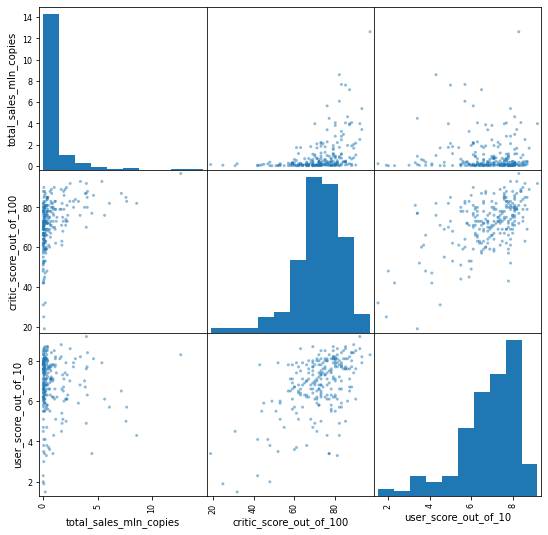

In [40]:
ps4_sales_score = actual_data[actual_data['platform'] == 'PS4']
ps4_sales_score = \
ps4_sales_score[['total_sales_mln_copies', 'critic_score_out_of_100', 'user_score_out_of_10']]
pd.plotting.scatter_matrix(ps4_sales_score, figsize=(9, 9));
ps4_sales_score.corr()

На графиках видно, что взаимосвязь между отзывами критиков и продажами слабая (0.4), а между отзывами пользователей и продажами отсутствует (-0.04). Из этого следует вывод, что отзывы пользователей не влияют на продажи игр, а отзывы критиков влияют, но очень слабо. Проверим данный вывод на примере остальных платформ:

,total_sales_mln_copies,critic_score_out_of_100,user_score_out_of_10
total_sales_mln_copies,1.000000,0.309474,-0.023478
critic_score_out_of_100,0.309474,1.000000,0.485783
user_score_out_of_10,-0.023478,0.485783,1.000000


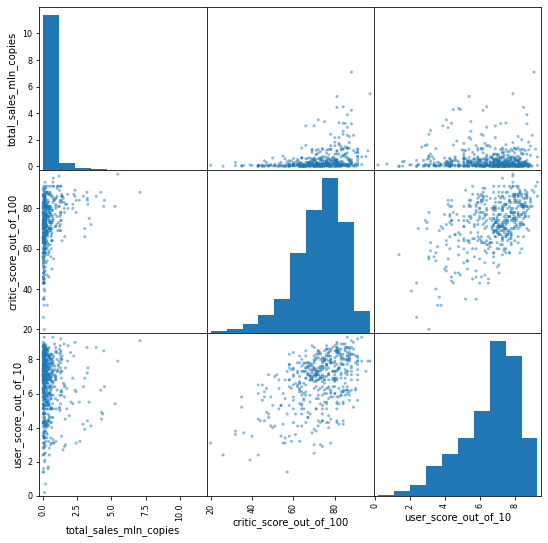

In [41]:
actual_data_without_ps4 = actual_data[actual_data['platform'] != 'PS4']
total_sales_score = \
actual_data_without_ps4[['total_sales_mln_copies', 'critic_score_out_of_100', 'user_score_out_of_10']]
pd.plotting.scatter_matrix(total_sales_score, figsize=(9, 9));
total_sales_score.corr()

Вывод подтвердился, отзывы пользователей не влияют на продажи игр (-0.02), а отзывы критиков влияют несущественно, взаимосвязь слабая (0.3).

- **Посмотрим на общее распределение игр по жанрам, выявим самые прибыльные жанры и проверим выделяются ли жанры с высокими и низкими продажами.**

,count,mean,median
genre,,,
Action,619,0.322068,0.090
Role-Playing,221,0.459005,0.110
Adventure,185,0.094865,0.030
Sports,161,0.680000,0.180
Shooter,128,1.335469,0.515
Misc,113,0.332301,0.090
Racing,69,0.398841,0.090
Fighting,60,0.470333,0.125
Simulation,44,0.298409,0.100


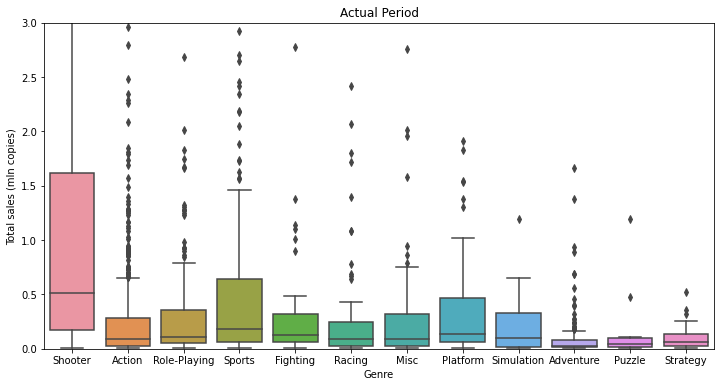

In [42]:
plt.figure(figsize=(12,6))
sbrn.boxplot(x='genre', y='total_sales_mln_copies', data=actual_data)
plt.xlabel('Genre')
plt.ylabel('Total sales (mln copies)')
plt.title('Actual Period')
plt.ylim([0, 3]);
actual_data.groupby('genre')['total_sales_mln_copies'].agg(['count', 'mean', 'median'])\
.sort_values('count',ascending=False)

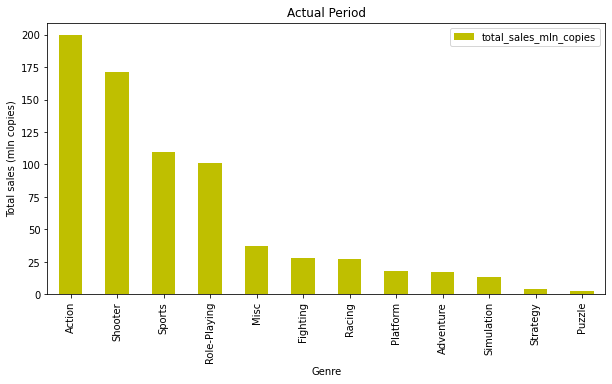

In [43]:
actual_data.groupby('genre').agg({'total_sales_mln_copies':'sum'})\
.sort_values('total_sales_mln_copies',ascending=False)\
.plot(kind='bar',figsize=(10,5), color = 'y');
plt.xlabel('Genre')
plt.ylabel('Total sales (mln copies)')
plt.title('Actual Period');

Из данных следует, что самым выпускаемым жанром на всех платформах актуального периода является Action, после него следуют Role-Playing и Adventure. Наименее выпускаемыми являются жанры Puzzle, Strategy и Platform. При этом, наибольшее количество проданных копий принадлежит жанрам Action, Shooter и Sports, а наименьшее количество проданных копий жанрам - Puzzle, Strategy и Simmulation. По средним продажам лидирует жанр Shooter. В целом можно сделать вывод, что более интеллектуальные игры менее прибыльные, это можно объяснить более простой графикой и меньшей активностью в самой игре по сравнению с Action и Shooter. В целом распределение выглядит вполне логично.

Вывод: 
- наибольшее количество игр выпустилось в 2008 (1427 игр) и 2009 (1426 игр), после этого пика последовал спад, что можно связать с большей работой над качеством игр и соответственно увеличением временного интервала между релизами, а также доля консолевых игр могла сократиться засчет увеличения количества мобильных приложений;
- наибольшее количество копий за все время было продано на платформе PS2, X360, PS3, Wii, DS, PS. Половина платформ, попавших в топ, принадлежит компании Sony, в том числе первое место по продажам за все время (PS2);
- в среднем каждая платформа существовала на протяжении 10 лет, пик продаж происходит в среднем через 4 года с даты релиза. На примере компании Sony прослеживается закономерность - при падении продаж происходит выпуск новой платформы, например спад продаж PS2 пришелся на 2005 и в 2006 вышла новая платформа PS3. Закономерность выпуска новых платформ компании Microsoft такая же как у Sony. При спаде продаж старой платформы, появляется новая. Исходя из того, что жизненный цикл платформ составляет 10 лет, а их пик приходится на четвертый год продаж, чтобы объективно составить прогноз на 2017 год за актуальный период взяты данные с 2014 года. В этот год заметен рост продаж новых платформ и спад старых. Более ранние периоды не имеет смысла анализировать, потому что их пик продаж произойдет спустя 4 года и в 2017 начнется спад, выгоды от продвижения таких платформ будет меньше, чем от новых поколений;
- две потенциально прибыльные платформы - это PS4 и XOne. У обеих платформ пик продаж в 2015 году и дальнейший спад продаж в 2016, это может быть связано с общим спадом в индустрии о котором говорилось ранее, а также с тем, что данные за 2016 год не полные, поэтому с полной уверенностью нельзя утверждать, что данные лидирующие платформы стали менее востребованы;
- отзывы пользователей не влияют на продажи игр, а отзывы критиков влияют, но очень слабо;
- самым выпускаемым жанром на всех платформах актуального периода является Action, после него следуют Role-Playing и Adventure. Наименее выпускаемыми являются жанры Puzzle, Strategy и Platform. При этом, наибольшее количество проданных копий принадлежит жанрам Action, Shooter и Sports, а наименьшее количество проданных копий жанрам - Puzzle, Strategy и Simmulation. По средним продажам лидирует жанр Shooter. Потенциально прибыльные жанры - это Action, Shooter и Sports.

### Составим портрет пользователя каждого региона

- **Определим для пользователя каждого региона (NA, EU, JP) самые популярные платформы (топ-5) и опишем различия в долях продаж.**

In [44]:
def top_sales_region(group, region, xlabel, title):
    data = actual_data.groupby(group, as_index=False).agg({region:'sum'})\
    .sort_values(region, ascending=False)
    data['share'] = data[region] / data[region].sum()*100
    print(data.head())
    fig, ax = plt.subplots(figsize=(8,4))
    sbrn.barplot(ax=ax, x = group, y = data['share'], data = data.head())
    plt.xlabel(xlabel)
    plt.ylabel('Sales share')
    plt.title(title)

  platform  na_sales_mln_copies      share
3      PS4                98.61  34.714497
9     XOne                81.27  28.610153
8     X360                28.30   9.962684
0      3DS                22.64   7.970147
2      PS3                22.05   7.762445


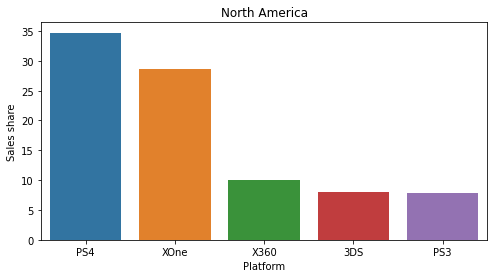

In [45]:
top_sales_region('platform', 'na_sales_mln_copies','Platform', 'North America')

В Северной Америке лидирующую позицию занимает PS4 с долей рынка 34.7%, но стоит отметить, что XOne не сильно отстает и занимает 28.6% рынка.

  platform  eu_sales_mln_copies      share
3      PS4               130.04  48.041968
9     XOne                46.25  17.086597
2      PS3                25.54   9.435496
1       PC                17.97   6.638836
0      3DS                16.12   5.955372


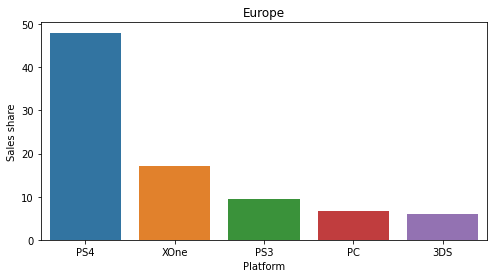

In [46]:
top_sales_region('platform', 'eu_sales_mln_copies','Platform', 'Europe')

В Европе большую долю рынка также занимает PS4(48%), но существенно опережает XOne(17%)

  platform  jp_sales_mln_copies      share
0      3DS                44.24  47.523902
3      PS4                15.02  16.134923
5      PSV                14.54  15.619293
2      PS3                11.22  12.052852
7     WiiU                 7.31   7.852616


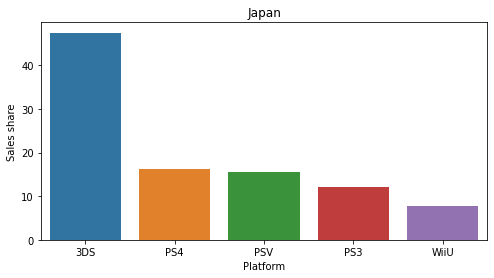

In [47]:
top_sales_region('platform', 'jp_sales_mln_copies','Platform', 'Japan')

В Японии ситуация не похожа на предыдущие два региона, здесь лидирует 3DS (что логично, производитель этой платформы японская компания Nintendo) с долей рынка 47.5%, при этом PS4 намного менее популярен (доля рынка 16%) и стоит отметить, что практически наравне со вторым третье место по доле на рынке занимает PSV (15.6%). Стоит отметить, что в топ-5 не вошел XOne, первое и последнее место в топе занимают японские производители платформ, остальные заняты разными платформами компании Sony.

- **Теперь определим самые популярные жанры (топ-5)**

           genre  na_sales_mln_copies      share
8        Shooter                79.02  27.818067
0         Action                72.53  25.533338
10        Sports                46.13  16.239527
7   Role-Playing                33.47  11.782722
3           Misc                15.05   5.298176


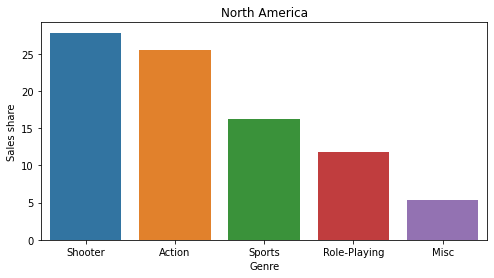

In [48]:
top_sales_region('genre', 'na_sales_mln_copies','Genre', 'North America')

В Северной Америке лидирует жанр Shooter(27.8%), второе место с незначительным отставанием занимает жанр Action(25.5%) и завершает тройку лидеров жанр Sports(16.2%), оставшиеся доли в топ-5 принадлежат жанрам Role-Playing(11.8%) и Misc(5.2%)

           genre  eu_sales_mln_copies      share
0         Action                74.68  27.589774
8        Shooter                65.52  24.205704
10        Sports                45.73  16.894488
7   Role-Playing                28.17  10.407123
6         Racing                14.13   5.220186


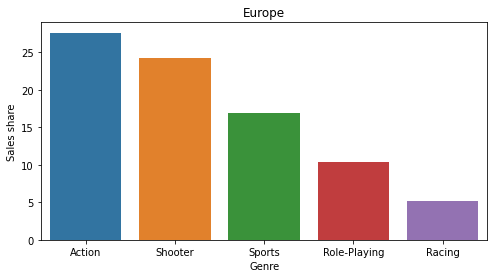

In [49]:
top_sales_region('genre', 'eu_sales_mln_copies','Genre', 'Europe')

В Европе также наибольшие доли рынка занимают Action (27.6%) и Shooter(24.2%), только в отличие от Америки в Европе на первое место вышли игры в жанре Action. На третьем и четвертом месте топа также Sports(16.9%) и Role-Playing(10.4%), завершает пятерку лидеров жанр Racing(5.2%)

          genre  jp_sales_mln_copies      share
7  Role-Playing                31.16  33.472983
0        Action                29.58  31.775701
2      Fighting                 6.37   6.842840
3          Misc                 5.61   6.026426
8       Shooter                 4.87   5.231496


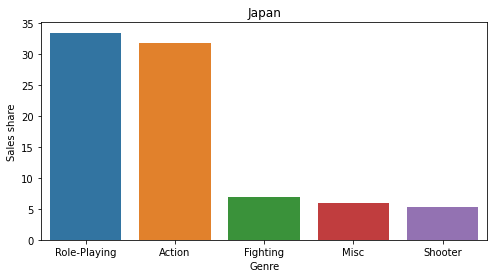

In [50]:
top_sales_region('genre', 'jp_sales_mln_copies','Genre', 'Japan')

В Японии лидирующую долю рынка занимают игры в жанре Role-Playing(33.5%) и с незначительным отставанием второе место занимают игры в жанре Action(31.8%). Доли остальных жанров в топ-5 значительно меньше и примерно равны: Fighting(6.8%), Misc(6%) и Shooter(5.2%)

- **Определим влияет ли рейтинг ESRB на продажи в отдельном регионе.**

Entertainment Software Rating Board — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков». Ниже представлено описание каждого элемента рейтинга:
- **EC** (Early childhood) - 'для детей младшего возраста': игра подходит для детей от 3 лет и не содержит материалов, которые родители могли бы счесть неподходящими;
- **E** (Everyone) - 'для всех': содержание вполне подходит для всех возрастов. Такие игры могут понравиться и взрослым. Первоначально назывался **K-A** (Kids to Adults);
- **E10+** (Everyone 10 and older) - 'для всех от 10 лет и старше': проекты с данным рейтингом могут содержать или немного больше мультипликационного или мягкого насилия, или несколько откровенные сцены, или минимальное количество крови;
- **T** (Teen) - 'подросткам': игра подходит для лиц от 13 лет. Проекты из данной категории могут содержать насилие, непристойные сцены, грубый юмор, в меру откровенное сексуальное содержимое, кровь или нечастое использование ненормативной лексики;
- **M** (Mature) - 'для взрослых': материалы игры не подходят для лиц младше 17 лет. Проекты с данным рейтингом могут содержать достаточно жестокое насилие, большое количество крови с расчленением, непристойные сексуальные сцены или грубую ненормативную лексику, нежелательную для младшей аудитории;
- **AO** (Adults Only 18+) - 'только для взрослых': содержание игры только для взрослых старше 18 лет. Продукты из данной категории могут содержать длительные сцены жестокого насилия и/или очень откровенное сексуальное содержимое, а также сцены с обнажением;
- **RP** (Rating Pending) - 'рейтинг ожидается': Продукт был отправлен в ESRB и ожидает присвоения рейтинга. Данный логотип используется только на рекламных презентациях и в демо-версиях игр до официальной даты выпуска в продажу;
- **RP 17+** (Rating Pending) - 'рейтинг ожидается - примерно 17+': Продукт отправлен ESRB на оценку, но примерное содержание близко к рейтингу **M**.

Сначала посмотрим доли рейтингов всех регионов за актуальный период:

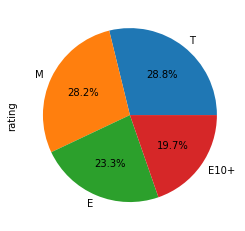

In [51]:
actual_data['rating'].value_counts().plot(kind='pie', autopct='%1.1f%%');

В данном актуальном периоде игры делятся на 4 возрастные группы 'игры для подростков' и 'для взрослых' занимают по 28% от общего числа игр, далее с долей в 23% идут 'игры для всех' и на последнем месте 'игры для всех от 10 лет и старше'. Теперь посмотрим влияет ли рейтинг на продажи по регионам

  rating  na_sales_mln_copies      share
2      M                96.42  43.959150
0      E                50.74  23.133035
3      T                38.95  17.757819
1   E10+                33.23  15.149995


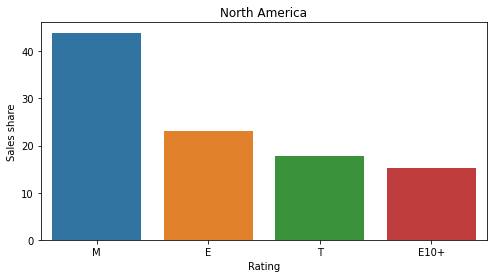

In [52]:
top_sales_region('rating', 'na_sales_mln_copies','Rating', 'North America')

  rating  eu_sales_mln_copies      share
2      M                93.44  44.131677
0      E                58.06  27.421716
3      T                34.07  16.091248
1   E10+                26.16  12.355358


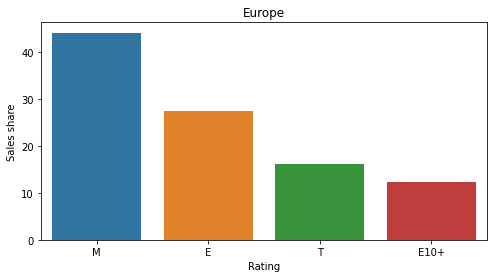

In [53]:
top_sales_region('rating', 'eu_sales_mln_copies','Rating', 'Europe')

  rating  jp_sales_mln_copies      share
3      T                14.78  40.840011
0      E                 8.94  24.702957
2      M                 8.01  22.133186
1   E10+                 4.46  12.323846


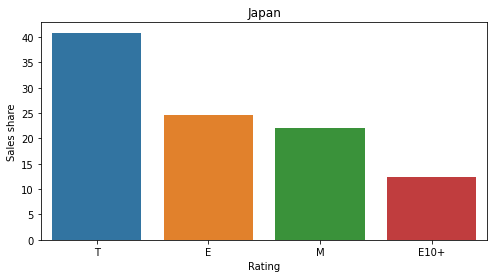

In [54]:
top_sales_region('rating', 'jp_sales_mln_copies','Rating', 'Japan')

Из данных следует, что в Северной Америке и Европе наибольшую долю проданных игр занимает категория с рейтингом **M**(44%), В Японии ситуация отличается, первое место там занимают игры с рейтингом **T**(41%). Второе место во всех трех регионах принадлежит играм с рейтингом **E** (~25%). Ситуация с третьим(**T**) и четвертым(**E10+**) местом похожая в Северной Америке и Европе, занимают примерно одинаковые доли. В Японии доли распределились наоборот, третье место принадлежит категории **M**(22%) и четвертое **E10+**(12%).

Вывод: 
- в Северной Америке в топ-5 самых популярных платформ входит PS4(34.7%), XOne(28.6%), X360(10%), 3DS(8%) и PS3(8%). По жанрам лидирует Shooter(27.8%), второе место с незначительным отставанием занимает жанр Action(25.5%) и завершает тройку лидеров жанр Sports(16.2%), оставшиеся доли в топ-5 принадлежат жанрам Role-Playing(11.8%) и Misc(5.2%), а также наибольшую долю проданных игр занимает категория с рейтингом M(44%), второе место принадлежит играм с рейтингом E (25%), третье T (18%) и четвертое E10+(15%). Таким образом наиболее вероятный портрет пользователей из Северной Америки - это взрослые люди старше 17 лет, предпочитающие игры в жанре Shooter и Action на платформах PS4 и Xone.
- в Европе в топ-5 самых популярных платформ входит PS4(48%), XOne(17%), PS3(9.4%), PC(6.6%) и 3DS(6%). По жанрам лидирует Action (27.6%), второе место с незначительным отставанием занимает жанр Shooter(24%) и завершает тройку лидеров жанр Sports(16.9%), оставшиеся доли в топ-5 принадлежат жанрам Role-Playing(10.4%) и Racing(5.2%), а также наибольшую долю проданных игр занимает категория с рейтингом M(44%), второе место принадлежит играм с рейтингом E (27.4%), третье T (16%) и четвертое E10+(12%). Таким образом наиболее вероятный портрет пользователей из Европы - это взрослые люди старше 17 лет, предпочитающие игры в жанре Action и Shooter на платформе PS4.
- в Японии в топ-5 самых популярных платформ входит 3DS(47.5%), PS4(16.1%), PSV(15.6%), PS3(12%) и WiiU(7.8%). По жанрам лидирует Role-playing (33.5%), второе место с незначительным отставанием занимает жанр Action(31.7%) и завершает тройку лидеров жанр Fighting(6.8%), оставшиеся доли в топ-5 принадлежат жанрам Misc(6%) и Shooter(5.2%), а также наибольшую долю проданных игр занимает категория с рейтингом T(40.8%), второе место принадлежит играм с рейтингом E (24.7%), третье M (22.1%) и четвертое E10+(12.3%). Таким образом наиболее вероятный портрет пользователей из Японии - это подростки старше 13 лет, предпочитающие игры в жанре Role-Playing и Action на платформе 3DS.

Таким образом портрет пользователей из Северной Америки и Европы имеют много схожих характеристик и в целом похожи, а пользователи из Японии сильно отличаются по всем проанализированным параметрам, начиная от возрастной категории до предпочитаемых жанров игр и платформ, это может быть обусловлено особенностями данного региона, например предпочитаемый японцами DS3 принадлежит японской компании Nintendo.

### Проверка гипотез

**1 гипотеза: средние пользовательские рейтинги платформ Xbox One и PC одинаковые**

- Нулевая гипотеза - средняя пользовательская оценка платформы Xbox One **равна** средней пользовательской оценке платформы PC
- Альтернативная гипотеза - средняя пользовательская оценка платформы Xbox One **не равна** средней пользовательской оценке платформы PC
- уровень значимости **alpha = 0.05**
- используем критерий Левене  для исследования равенства дисперсий и затем проведем t-тест, чтобы проверить гипотезу

In [55]:
xbox_one = actual_data[actual_data['platform'] =='XOne']
xbox_one = xbox_one[xbox_one['user_score_out_of_10'].isnull() == False]
pc = actual_data[actual_data['platform'] =='PC']
pc = pc[pc['user_score_out_of_10'].isnull() == False]

LeveneResult(statistic=6.004772988517075, pvalue=0.014868430917663678)

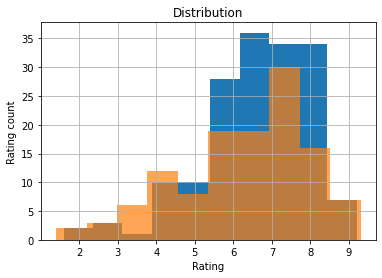

In [56]:
xbox_one.user_score_out_of_10.hist()
pc.user_score_out_of_10.hist(alpha=0.7)
plt.xlabel('Rating')
plt.ylabel('Rating count')
plt.title('Distribution');
st.levene(xbox_one.user_score_out_of_10, pc.user_score_out_of_10, center ='median')

P-value меньше, чем alpha, то есть можно предположить, что дисперсии генеральных совокупностей разные, это значит, что следует указать equal_var = False при вызове метода scipy.stats.ttest_ind().

In [57]:
xbox_one = xbox_one['user_score_out_of_10']
pc = pc['user_score_out_of_10']
results = st.ttest_ind(xbox_one, pc, equal_var=False)
alpha = 0.05
print('p-значение:', results.pvalue)
if (results.pvalue<alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 0.11601398086668832
Не получилось отвергнуть нулевую гипотезу


Полученный результат p-value говорит о том, что нулевая гипотеза не может быть отвергнута, так как p-value больше alpha. Данные не противоречат гипотезе 'средняя пользовательская оценка Xbox One равна средней пользовательской оценке PC'.

**2 гипотеза: Средние пользовательские рейтинги жанров Action и Sports разные.**

- Нулевая гипотеза - средняя пользовательская оценка жанра Action **равна** средней пользовательской оценке жанра Sports
- Альтернативная гипотеза - средняя пользовательская оценка жанра Action **не равна** средней пользовательской оценке жанра Sports
- уровень значимости **alpha = 0.05**
- используем критерий Левене  для исследования равенства дисперсий и затем проведем t-тест, чтобы проверить гипотезу

In [58]:
action = actual_data[actual_data['genre'] =='Action']
action = action[action['user_score_out_of_10'].isnull() == False]
sports = actual_data[actual_data['genre'] =='Sports']
sports = sports[sports['user_score_out_of_10'].isnull() == False]

LeveneResult(statistic=21.607428421856284, pvalue=4.480161685830322e-06)

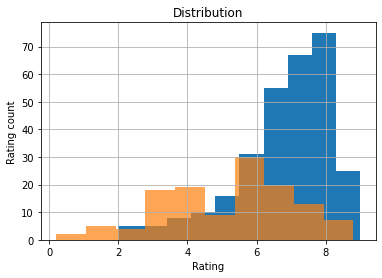

In [59]:
action.user_score_out_of_10.hist()
sports.user_score_out_of_10.hist(alpha=0.7)
plt.xlabel('Rating')
plt.ylabel('Rating count')
plt.title('Distribution');
st.levene(action.user_score_out_of_10, sports.user_score_out_of_10, center ='median')

P-value больше, чем alpha, то есть у нас нет оснований полагать, что дисперсии генеральных совокупностей разные, это значит, что указывать equal_var = False при вызове метода scipy.stats.ttest_ind() не обязательно, потому что по умолчанию этот параметр примет значение True.

In [60]:
action = action['user_score_out_of_10']
sports = sports['user_score_out_of_10']
results = st.ttest_ind(action, sports)
alpha = 0.05
print('p-значение:', results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 2.8711147985105864e-19
Отвергаем нулевую гипотезу


Полученный результат о том, что нулевая гипотеза может быть отвергнута, означает, что средняя пользовательская оценка жанра Action не равна средней пользовательской оценке жанра Sports.

Вывод: полученные данные по первой гипотезе не противоречат нулевой гипотезе о том, что средняя пользовательская оценка платформы Xbox One равна средней пользовательской оценке платформы PC. Это говорит о верной изначальной гипотезе. Полученные данные по второй гипотезе позволяют отвергнуть нулевую гипотезу о том, что средняя пользовательская оценка жанра Action равна средней пользовательской оценке жанра Sports. Это означает, что изначальная гипотеза была верной и пользовательские оценки действительно разные.

### Общий вывод

В процессе исследования, была проведена предобработка данных, выявлены закономерности, проведен анализ данных, составлен портрет пользователя каждого региона, сформулированы гипотезы и сделаны следующие выводы:
- наибольшее количество игр выпустилось в 2008 (1427 игр) и 2009 (1426 игр), после этого пика последовал спад, что можно связать с большей работой над качеством игр и соответственно увеличением временного интервала между релизами, а также доля консолевых игр могла сократиться засчет увеличения количества мобильных приложений;
- наибольшее количество копий за все время было продано на платформе PS2, X360, PS3, Wii, DS, PS. Половина платформ, попавших в топ, принадлежит компании Sony, в том числе первое место по продажам за все время (PS2);
- в среднем каждая платформа существовала на протяжении 10 лет, пик продаж происходит в среднем через 4 года с даты релиза. На примере компании Sony прослеживается закономерность - при падении продаж происходит выпуск новой платформы, например спад продаж PS2 пришелся на 2005 и в 2006 вышла новая платформа PS3. Закономерность выпуска новых платформ компании Microsoft такая же как у Sony. При спаде продаж старой платформы, появляется новая. Исходя из того, что жизненный цикл платформ составляет 10 лет, а их пик приходится на четвертый год продаж, чтобы объективно составить прогноз на 2017 год за актуальный период взяты данные с 2014 года. В этот год заметен рост продаж новых платформ и спад старых. Более ранние периоды не имеет смысла анализировать, потому что их пик продаж произойдет спустя 4 года и в 2017 начнется спад, выгоды от продвижения таких платформ будет меньше, чем от новых поколений;
- две потенциально прибыльные платформы - это PS4 и XOne. У обеих платформ пик продаж в 2015 году и дальнейший спад продаж в 2016, это может быть связано с общим спадом в индустрии о котором говорилось ранее, а также с тем, что данные за 2016 год не полные, поэтому с полной уверенностью нельзя утверждать, что данные лидирующие платформы стали менее востребованы;
- отзывы пользователей не влияют на продажи игр, а отзывы критиков влияют, но очень слабо;
- самым выпускаемым жанром на всех платформах актуального периода является Action, после него следуют Role-Playing и Adventure. Наименее выпускаемыми являются жанры Puzzle, Strategy и Platform. При этом, наибольшее количество проданных копий принадлежит жанрам Action, Shooter и Sports, а наименьшее количество проданных копий жанрам - Puzzle, Strategy и Simmulation. По средним продажам лидирует жанр Shooter. Потенциально прибыльные жанры - это Action, Shooter и Sports.
- в Северной Америке в топ-5 самых популярных платформ входит PS4(34.7%), XOne(28.6%), X360(10%), 3DS(8%) и PS3(8%). По жанрам лидирует Shooter(27.8%), второе место с незначительным отставанием занимает жанр Action(25.5%) и завершает тройку лидеров жанр Sports(16.2%), оставшиеся доли в топ-5 принадлежат жанрам Role-Playing(11.8%) и Misc(5.2%), а также наибольшую долю проданных игр занимает категория с рейтингом M(44%), второе место принадлежит играм с рейтингом E (25%), третье T (18%) и четвертое E10+(15%). Таким образом наиболее вероятный портрет пользователей из Северной Америки - это взрослые люди старше 17 лет, предпочитающие игры в жанре Shooter и Action на платформах PS4 и Xone.
- в Европе в топ-5 самых популярных платформ входит PS4(48%), XOne(17%), PS3(9.4%), PC(6.6%) и 3DS(6%). По жанрам лидирует Action (27.6%), второе место с незначительным отставанием занимает жанр Shooter(24%) и завершает тройку лидеров жанр Sports(16.9%), оставшиеся доли в топ-5 принадлежат жанрам Role-Playing(10.4%) и Racing(5.2%), а также наибольшую долю проданных игр занимает категория с рейтингом M(44%), второе место принадлежит играм с рейтингом E (27.4%), третье T (16%) и четвертое E10+(12%). Таким образом наиболее вероятный портрет пользователей из Европы - это взрослые люди старше 17 лет, предпочитающие игры в жанре Action и Shooter на платформе PS4.
- в Японии в топ-5 самых популярных платформ входит 3DS(47.5%), PS4(16.1%), PSV(15.6%), PS3(12%) и WiiU(7.8%). По жанрам лидирует Role-playing (33.5%), второе место с незначительным отставанием занимает жанр Action(31.7%) и завершает тройку лидеров жанр Fighting(6.8%), оставшиеся доли в топ-5 принадлежат жанрам Misc(6%) и Shooter(5.2%), а также наибольшую долю проданных игр занимает категория с рейтингом T(40.8%), второе место принадлежит играм с рейтингом E (24.7%), третье M (22.1%) и четвертое E10+(12.3%). Таким образом наиболее вероятный портрет пользователей из Японии - это подростки старше 13 лет, предпочитающие игры в жанре Role-Playing и Action на платформе 3DS.
- портреты пользователей из Северной Америки и Европы имеют много схожих характеристик и в целом похожи, а пользователи из Японии сильно отличаются по всем проанализированным параметрам, начиная от возрастной категории до предпочитаемых жанров игр и платформ, это может быть обусловлено особенностями данного региона, например предпочитаемый японцами DS3 принадлежит японской компании Nintendo.
- полученные данные по первой гипотезе не противоречат нулевой гипотезе о том, что средняя пользовательская оценка платформы Xbox One равна средней пользовательской оценке платформы PC. Это говорит о верной изначальной гипотезе. Полученные данные по второй гипотезе позволяют отвергнуть нулевую гипотезу о том, что средняя пользовательская оценка жанра Action равна средней пользовательской оценке жанра Sports. Это означает, что изначальная гипотеза была верной и пользовательские оценки действительно разные. 